# Import required modules

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

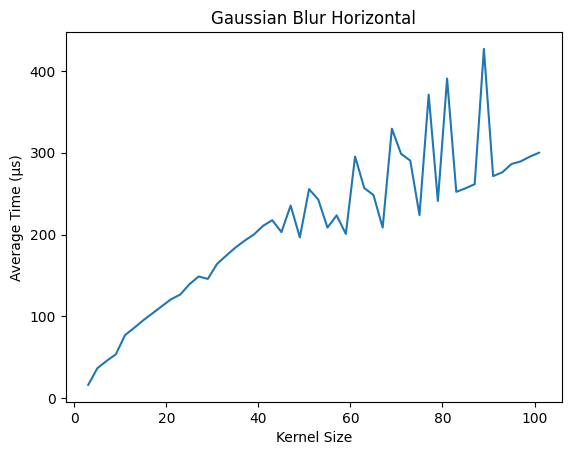

In [27]:
df = pd.read_csv('profile_cuda_1d_final.csv')

# Filter the DataFrame to only include rows where Name is equal to the desired value
filtered_df_x = df[df['Name'] == 'void gaussian_blur_x<uchar3, uchar3, float3>(float*, int, cv::cuda::PtrStepSz<uchar3>, cv::cuda::PtrStepSz<uchar3>)']

# Create the plot
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'])
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.title('Gaussian Blur Horizontal')
plt.savefig('./gaussian_blur_x.png')
plt.show()


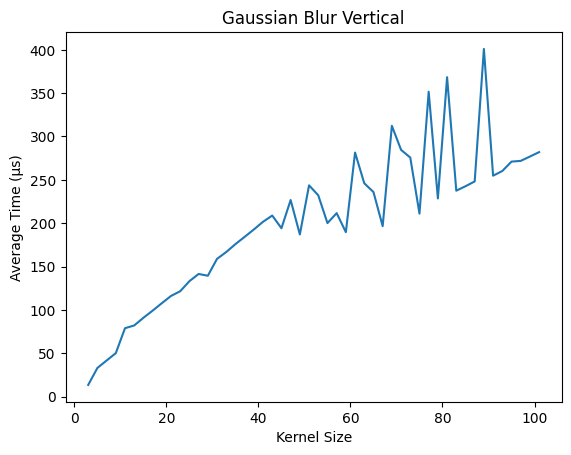

In [28]:
df = pd.read_csv('profile_cuda_1d_final.csv')

# Filter the DataFrame to only include rows where Name is equal to the desired value
filtered_df_y = df[df['Name'] == 'void gaussian_blur_y<uchar3, uchar3, float3>(float*, int, cv::cuda::PtrStepSz<uchar3>, cv::cuda::PtrStepSz<uchar3>)']

# Create the plot
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'])
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.title('Gaussian Blur Vertical')
plt.savefig('./gaussian_blur_y.png')
plt.show()



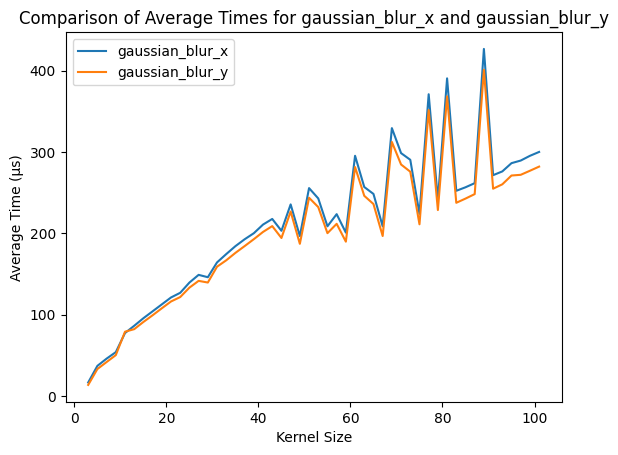

In [29]:
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'], label='gaussian_blur_x')
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'], label='gaussian_blur_y')

# set the axis labels and title
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.title('Comparison of Average Times for gaussian_blur_x and gaussian_blur_y')

# show the legend
plt.legend()

# show the plot
plt.savefig('./gaussian_blur_x_y.png')
plt.show()


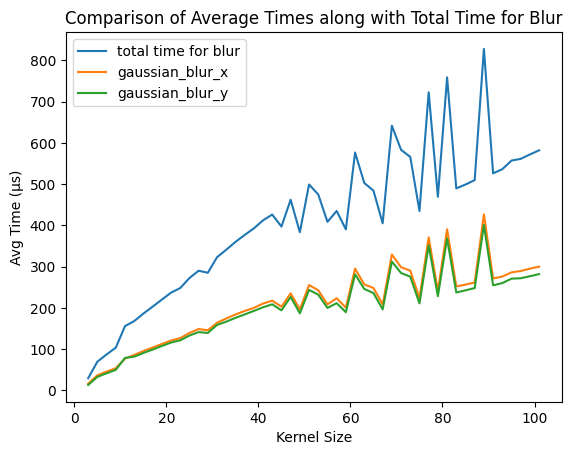

In [30]:
merged_df = pd.merge(filtered_df_x, filtered_df_y, on='kernel_size')
merged_df['Avg_Sum'] = merged_df['Avg_x'] + merged_df['Avg_y']
plt.plot(merged_df['kernel_size'], merged_df['Avg_Sum'], label="total time for blur")
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'], label='gaussian_blur_x')
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'], label='gaussian_blur_y')
plt.title('Comparison of Average Times along with Total Time for Blur')

plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (μs)')
plt.legend()

plt.savefig('./gaussian_blur_separable.png')
plt.show()


In [31]:
df_2d_cuda = pd.read_csv('profile_cuda_2d_final.csv')


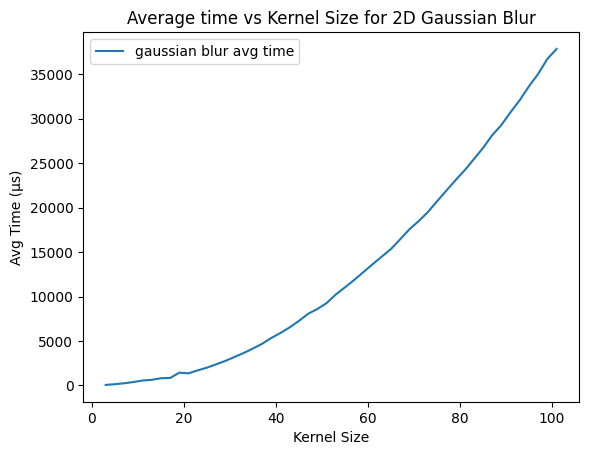

In [32]:
plt.plot(df_2d_cuda['kernel_size'], df_2d_cuda['Avg'], label='gaussian blur avg time')
plt.title('Average time vs Kernel Size for 2D Gaussian Blur')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (μs)')
plt.legend()
plt.savefig('./gaussian_blur_2d.png')
plt.show()

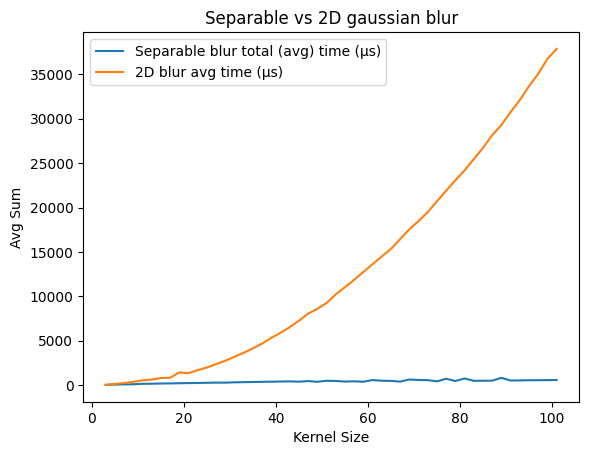

In [33]:
plt.title("Separable vs 2D gaussian blur")
plt.plot(merged_df['kernel_size'], merged_df['Avg_Sum'], label="Separable blur total (avg) time (μs)")
plt.plot(df_2d_cuda['kernel_size'], df_2d_cuda['Avg'], label='2D blur avg time (μs)')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Sum')
plt.legend()
plt.savefig('./gaussian_blur_separable_vs_2d.png')
plt.show()


In [44]:
np.mean(df_2d_cuda['Avg']/merged_df['Avg_Sum'])

25.72884601063999

In [35]:
df_multi_thread = pd.read_csv('profile_multi_threaded.csv')
df_multi_thread.head()

,KERNEL_SIZE,MAX_RUN_TIME,MIN_RUN_TIME,AVG_RUN_TIME,MEDIAN_RUN_TIME
0,3,27.4017,9.69179,15.1146,14.2623
1,5,33.1849,24.71130,27.7350,27.4469
2,7,70.5513,50.55360,58.7697,59.3271
3,9,103.8800,81.04660,93.1267,93.1682
4,11,141.8860,124.14000,131.4240,131.4890


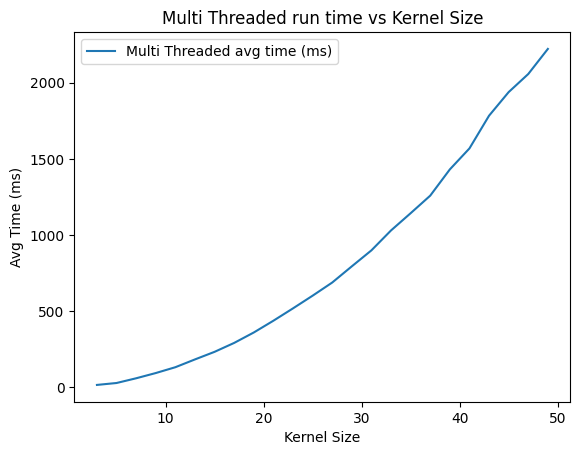

In [36]:
plt.title("Multi Threaded run time vs Kernel Size")
plt.plot(df_multi_thread['KERNEL_SIZE'], df_multi_thread['AVG_RUN_TIME'], label='Multi Threaded avg time (ms)')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.savefig('./gaussian_blur_cpu_multi_threaded.png')
plt.show()

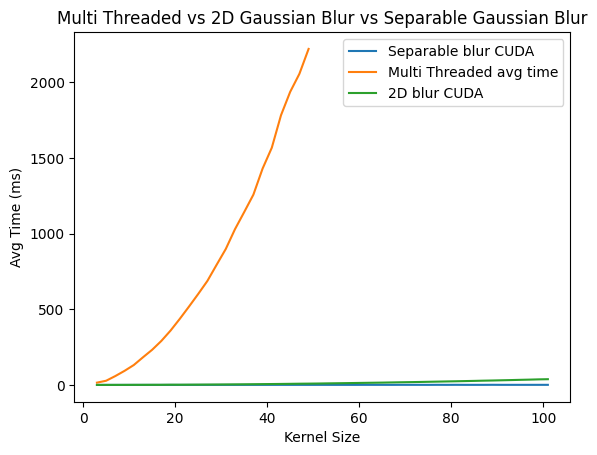

In [37]:
plt.title("Multi Threaded vs 2D Gaussian Blur vs Separable Gaussian Blur")
plt.plot(merged_df['kernel_size'],
        merged_df['Avg_Sum']/1000,
        label="Separable blur CUDA ")
plt.plot(df_multi_thread['KERNEL_SIZE'],
        df_multi_thread['AVG_RUN_TIME'],
        label='Multi Threaded avg time')
plt.plot(df_2d_cuda['kernel_size'],
        df_2d_cuda['Avg']/1000,
        label='2D blur CUDA')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.savefig('./gaussian_blur_multi_threaded_vs_2d_vs_separable.png')
plt.show()

In [47]:
np.mean(df_multi_thread['AVG_RUN_TIME']/(merged_df['Avg_Sum']/1000))

2461.733170982267

In [38]:
df_single_thread = pd.read_csv('profile_single_threaded.csv')
df_single_thread.head()

,KERNEL_SIZE,MAX_RUN_TIME,MIN_RUN_TIME,AVG_RUN_TIME,MEDIAN_RUN_TIME
0,3,76.1972,70.4216,71.0776,70.6812
1,5,184.0520,181.0470,182.2080,182.0480
2,7,433.5420,386.4340,396.0280,388.5180
3,9,689.2380,608.2920,623.3880,611.0450
4,11,960.6510,886.6300,895.5420,890.7390


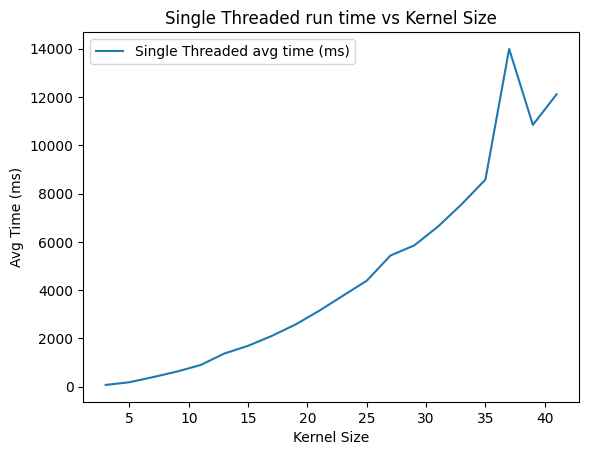

In [39]:
plt.title("Single Threaded run time vs Kernel Size")
plt.plot(df_single_thread['KERNEL_SIZE'], df_single_thread['AVG_RUN_TIME'], label='Single Threaded avg time (ms)')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.savefig('./gaussian_blur_cpu_single_threaded.png')
plt.show()


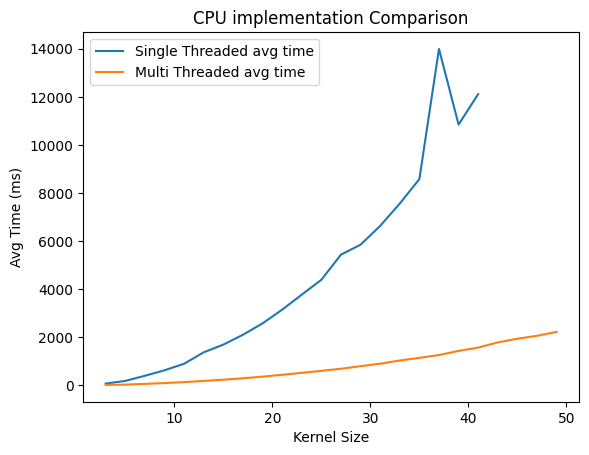

In [40]:
plt.title("CPU implementation Comparison")
plt.plot(df_single_thread['KERNEL_SIZE'],
        df_single_thread['AVG_RUN_TIME'],
        label='Single Threaded avg time')
plt.plot(df_multi_thread['KERNEL_SIZE'],
        df_multi_thread['AVG_RUN_TIME'],
        label='Multi Threaded avg time')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.savefig('./gaussian_blur_cpu_comparison.png')
plt.show()


In [46]:
# df_multi_thread['AVG_RUN_TIME']/df_single_thread['AVG_RUN_TIME']
# df_single_thread['AVG_RUN_TIME']
np.mean(df_single_thread['AVG_RUN_TIME']/df_multi_thread['AVG_RUN_TIME'])

7.319647486115952

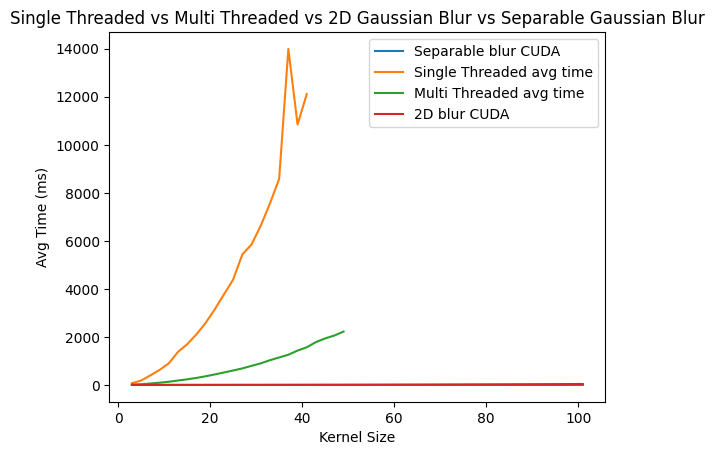

In [42]:
plt.title("Single Threaded vs Multi Threaded vs 2D Gaussian Blur vs Separable Gaussian Blur")
plt.plot(merged_df['kernel_size'],
        merged_df['Avg_Sum']/1000,
        label="Separable blur CUDA ")
plt.plot(df_single_thread['KERNEL_SIZE'],
        df_single_thread['AVG_RUN_TIME'],
        label='Single Threaded avg time')
plt.plot(df_multi_thread['KERNEL_SIZE'],
        df_multi_thread['AVG_RUN_TIME'],
        label='Multi Threaded avg time')
plt.plot(df_2d_cuda['kernel_size'],
        df_2d_cuda['Avg']/1000,
        label='2D blur CUDA')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.savefig('./gaussian_blur_single_threaded_vs_multi_threaded_vs_2d_vs_separable.png')
plt.show()
